In [1]:
import pandas as pd
df = pd.read_csv('survey.csv')
df.drop(columns=['Timestamp'],inplace=True)
df.head()

,Gender,Age,1. Marital Status:,Are your parents together or separated?,1. Have you experienced domestic abuse or family violence?,1. Has a parent or close family relative or love ones died in the last 12 months?,1. Have you recently ended a romantic relationship?,8. What is your highest level of education?,8. What is your current employment status?,8. Please indicate the highest level of schooling completed by your mother:,...,How often have you felt upset because something unexpected happened?,How often have you felt like you couldn’t control the important parts of your life?,How often have you felt nervous and stressed?,How often have you felt confident in solving your personal problems?,How often have you felt like things were going well for you?,How often do you feel like you have too much to do and can't handle it?,How often have you been able to stay calm and control your anger when something irritated you?,How often have you felt like you were in control of your life and responsibilities?,How often have you felt angry because things happened that were out of your control?,How often have you felt like your problems were too big to handle?
0,Male,26-35,"Single, never married",Nuclear (Both parents live together with their...,No,No,No,In Master,Student + Employed,Master’s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,18-25,"Single, never married",Nuclear (Both parents live together with their...,No,No,No,In bachelors,Student,Master’s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,18-25,"Single, never married",Nuclear (Both parents live together with their...,No,Yes,No,In bachelors,Student,Master’s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,"Below 18, 18-25","Single, never married",Nuclear (Both parents live together with their...,Yes,No,No,In bachelors,Student,School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,18-25,"Single, never married",Nuclear (Both parents live together with their...,Yes,Yes,No,In bachelors,Student,Bachelor’s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def onehotencode_column(df, column_name):
    if column_name == '8. What field did you choose for your studies?':
        freq = df[column_name].value_counts(normalize=True)
        df[f'encoded_{column_name}', column_name] = df[column_name].map(freq)
        return df

    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # safer for future
    encoded = encoder.fit_transform(df[[column_name]])
    encoded_cols = [f"{column_name}_{cat}" for cat in encoder.categories_[0]]
    encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)

    # Replace original column with encoded columns
    df = df.drop(columns=[column_name])
    df = pd.concat([df, encoded_df])

    return df

def labelencode_column(df, column_name):
    encoder = LabelEncoder()
    df[column_name] = encoder.fit_transform(df[column_name])
    return df

In [3]:
import re

encoding_strategy = {
    'Gender':'one-hot',
    'Age': 'label',  # ordinal (Below 18 < 18-25 < 26-35 etc.)
    '1. Marital Status:': 'onehot',
    'Are your parents together or separated?': 'onehot',
    '1. Have you experienced domestic abuse or family violence?': 'onehot',
    '1. Has a parent or close family relative or love ones died in the last 12 months?': 'onehot',
    '1. Have you recently ended a romantic relationship?': 'onehot',
    '8. What is your highest level of education?': 'label',  # ordinal (School < Bachelors < Masters)
    '8. What is your current employment status?': 'onehot',
    '8. Please indicate the highest level of schooling completed by your mother:': 'label',
    '8. Please indicate the highest level of schooling completed by your Father:': 'label',
    '8. How often do you exercise or walk ?': 'label',  # ordinal
    '8. If given a choice between a healthy meal and junk food, which would you pick?': 'label',
    '8. How many times a week do you eat home-cooked meals instead of fast food?': 'label',
    '8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?': 'onehot',
    '8. Has anyone in your family been diagnosed with psychological condition ?': 'onehot',
    'How happy are you with your living situation?': 'label',
    '8. What field did you choose for your studies?': 'onehot',  # may want to drop if too many categories
    '8. Are you satisfied with your choice to pursue this degree program?': 'label',
    '20.Do you consider your course load stressful?': 'label',
    '21.Do you feel stressed about your current financial situation? Why?': 'drop_or_nlp',

    # Anxiety & depression related questions:
    'How often do you feel worried or nervous?': 'label',
    'Do you find yourself worrying excessively about different things': 'label',
    'How difficult is it for you to control your worries?': 'label',
    'Do you experience physical symptoms like sweating, shaking, or a racing heartbeat when anxious?': 'label',
    'Do you feel uneasy or find it hard to relax?': 'label',
    'How often do you find it hard to concentrate or focus ?': 'label',
    'Do you avoid social situations because of fear or nervousness?': 'label',
    'Have you ever felt sudden fear or panic (panic attrack )?': 'label',
    'Does your anxiety make daily life, work, or relationships harder?': 'label',
    'How often do you feel like something bad is going to happen, even if there’s no clear reason?': 'label',
    'How often do you feel sad or down?': 'label',
    'Do you feel hopeless about the future?': 'label',
    'How often do you feel bad about yourself or guilty?': 'label',
    'Do you enjoy the things you used to love doing?': 'label',
    'Do you have trouble sleeping?': 'label',
    'Do you feel like crying more than before?': 'label',
    'Do you feel restless or slowed down?': 'label',
    'Have you had thoughts about harming yourself?': 'label',
    'How is your energy level?': 'label',
    'How is your appetite?': 'label',

    # Perceived stress scale items (ordinal scale assumed):
    'How often have you felt upset because something unexpected happened?': 'label',
    'How often have you felt like you couldn’t control the important parts of your life?': 'label',
    'How often have you felt nervous and stressed?': 'label',
    'How often have you felt confident in solving your personal problems?': 'label',
    'How often have you felt like things were going well for you?': 'label',
    'How often do you feel like you have too much to do and can\'t handle it?': 'label',
    'How often have you been able to stay calm and control your anger when something irritated you?': 'label',
    'How often have you felt like you were in control of your life and responsibilities?': 'label',
    'How often have you felt angry because things happened that were out of your control?': 'label',
    'How often have you felt like your problems were too big to handle?': 'label'
}

df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)
print("Columns after stripping whitespace:", df.columns.tolist())
df.head()



Columns after stripping whitespace: ['Gender', 'Age', '1. Marital Status:', 'Are your parents together or separated?', '1. Have you experienced domestic abuse or family violence?', '1. Has a parent or close family relative or love ones died in the last 12 months?', '1. Have you recently ended a romantic relationship?', '8. What is your highest level of education?', '8. What is your current employment status?', '8. Please indicate the highest level of schooling completed by your mother:', '8. Please indicate the highest level of schooling completed by your Father:', '8. How often do you exercise or walk ?', '8. If given a choice between a healthy meal and junk food, which would you pick?', '8. How many times a week do you eat home-cooked meals instead of fast food?', '8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?', '8. Has anyone in your family been diagnosed with psychological condition ?', 'How happy are you with your living situation?', '8. Wh

,Gender,Age,1. Marital Status:,Are your parents together or separated?,1. Have you experienced domestic abuse or family violence?,1. Has a parent or close family relative or love ones died in the last 12 months?,1. Have you recently ended a romantic relationship?,8. What is your highest level of education?,8. What is your current employment status?,8. Please indicate the highest level of schooling completed by your mother:,...,How often have you felt upset because something unexpected happened?,How often have you felt like you couldn’t control the important parts of your life?,How often have you felt nervous and stressed?,How often have you felt confident in solving your personal problems?,How often have you felt like things were going well for you?,How often do you feel like you have too much to do and can't handle it?,How often have you been able to stay calm and control your anger when something irritated you?,How often have you felt like you were in control of your life and responsibilities?,How often have you felt angry because things happened that were out of your control?,How often have you felt like your problems were too big to handle?
0,Male,26-35,"Single, never married",Nuclear (Both parents live together with their...,No,No,No,In Master,Student + Employed,Master’s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,18-25,"Single, never married",Nuclear (Both parents live together with their...,No,No,No,In bachelors,Student,Master’s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,18-25,"Single, never married",Nuclear (Both parents live together with their...,No,Yes,No,In bachelors,Student,Master’s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,"Below 18, 18-25","Single, never married",Nuclear (Both parents live together with their...,Yes,No,No,In bachelors,Student,School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,18-25,"Single, never married",Nuclear (Both parents live together with their...,Yes,Yes,No,In bachelors,Student,Bachelor’s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

def enhanced_clean_field(text):
    # Standardize degree prefixes
    text = re.sub(r'\bbs\b|\bb\.?\s?s\.?\b', 'bachelor of science', text)
    text = re.sub(r'\bba\b|\bb\.?\s?a\.?\b', 'bachelor of arts', text)
    text = re.sub(r'\bb\.?\s?com\b', 'bachelor of commerce', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Standardize common terms
    text = re.sub(r'\bengg\b|\bengn\b', 'engineering', text)
    text = re.sub(r'\btech\b', 'technology', text)
    text = re.sub(r'\bdept\b', 'department', text)

    # Remove stopwords (carefully - may lose meaning in academic fields)
    stop_words = set(stopwords.words('english')) - {'and', 'or', 'of'}
    words = text.split()
    words = [w for w in words if w not in stop_words]

    # Lemmatization (better than stemming for academic terms)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]

    return ' '.join(words).strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
%pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.8 MB/s eta 0:00:00


In [6]:
import re
from nltk.stem import WordNetLemmatizer
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from rapidfuzz import process
import numpy as np

# --- Enhanced Preprocessing ---
lemmatizer = WordNetLemmatizer()

def enhanced_clean_field(text):
    # Standardize degree prefixes and common abbreviations
    if pd.isna(text):
        return ""
    text = text.lower().strip()
    replacements = {
        r'\bbs\b|\bb\.?\s?s\.?': 'bachelor of science',
        r'\bb\.?\s?com\b': 'bachelor of commerce',
        r'\bengg?\b|\bengn\b': 'engineering',
        r'\btech\b': 'technology',
        r'\bcs\b': 'computer science',
        r'\bse\b': 'software engineering',
        r'\bai\b': 'artificial intelligence',
        r'\bit\b': 'information technology',
        r'\dpt\b': 'physical therapy'
    }

    for pattern, replacement in replacements.items():
        text = re.sub(pattern, replacement, text)

    # Remove special characters and standalone numbers
    text = re.sub(r'[^a-zA-Z\s]|(?<!\w)\d+(?!\w)', '', text)

    # Lemmatization (preserve meaning better than stemming)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if len(w) > 2]  # remove very short words
    return ' '.join(words).strip()

# --- Improved Clustering Approach ---
def optimal_clustering(embeddings, max_clusters=40):
    best_score = -1
    best_n = 2

    # Find optimal number of clusters using silhouette score
    for n in range(2, max_clusters+1):
        clustering = AgglomerativeClustering(n_clusters=n, metric='cosine', linkage='average')
        labels = clustering.fit_predict(embeddings)
        score = silhouette_score(embeddings, labels)

        if score > best_score:
            best_score = score
            best_n = n

    # Perform final clustering with optimal n
    final_clustering = AgglomerativeClustering(
        n_clusters=best_n,
        metric='cosine',
        linkage='average'
    )
    return final_clustering.fit_predict(embeddings)

def refine_clusters(clustered_fields, embeddings, unique_fields, fuzzy_threshold=85, semantic_threshold=0.8):
    # 1. Fuzzy merging (string similarity)
    def fuzzy_merge(group):
        merged = set()
        for item in group:
            matches = process.extract(item, group, score_cutoff=fuzzy_threshold)
            merged.update(m[0] for m in matches)
        return list(merged)

    fuzzy_merged = {k: fuzzy_merge(v) for k, v in clustered_fields.items()}

    # 2. Semantic merging (embedding similarity)
    # Calculate cluster centroids with NaN handling
    centroids = {}
    for label, items in fuzzy_merged.items():
        indices = [i for i, x in enumerate(unique_fields) if x in items]
        cluster_embeddings = embeddings[indices]

        # Remove any NaN embeddings
        valid_embeddings = cluster_embeddings[~np.isnan(cluster_embeddings).any(axis=1)]

        # Skip if no valid embeddings left
        if len(valid_embeddings) == 0:
            continue

        centroids[label] = np.mean(valid_embeddings, axis=0)

    # Merge similar clusters with shape validation
    final_clusters = {}
    used_labels = set()

    for label1, centroid1 in centroids.items():
        if label1 in used_labels:
            continue

        similar_items = fuzzy_merged[label1]

        for label2, centroid2 in centroids.items():
            if label2 != label1 and label2 not in used_labels:
                # Ensure centroids are 2D arrays for cosine_similarity
                c1 = np.array(centroid1).reshape(1, -1)
                c2 = np.array(centroid2).reshape(1, -1)

                # Check for NaN values before calculating similarity
                if not np.isnan(c1).any() and not np.isnan(c2).any():
                    similarity = cosine_similarity(c1, c2)[0][0]
                    if similarity > semantic_threshold:
                        similar_items.extend(fuzzy_merged[label2])
                        used_labels.add(label2)

        final_clusters[label1] = list(set(similar_items))  # Remove duplicates

    return final_clusters

def cluster_academic_fields(field_data):
    # 1. Clean and get unique non-empty fields
    cleaned_fields = [enhanced_clean_field(f) for f in field_data]
    cleaned_fields = [f for f in cleaned_fields if f]  # Remove empty strings
    unique_fields = list(set(cleaned_fields))

    # Skip processing if no valid fields found
    if not unique_fields:
        return field_data  # return original if nothing to cluster

    # 2. Generate embeddings
    model = SentenceTransformer('paraphrase-mpnet-base-v2')
    embeddings = model.encode(unique_fields)

    # Check for NaN in embeddings and handle
    if np.isnan(embeddings).any():
        valid_indices = ~np.isnan(embeddings).any(axis=1)
        embeddings = embeddings[valid_indices]
        unique_fields = [f for i, f in enumerate(unique_fields) if valid_indices[i]]

        # If no valid embeddings left, return original
        if len(unique_fields) == 0:
            return field_data

    # 3. Cluster with optimal method
    try:
        labels = optimal_clustering(embeddings)
    except ValueError as e:
        print(f"Clustering failed: {e}")
        return field_data

    clustered_fields = {}
    for label, field in zip(labels, unique_fields):
        clustered_fields.setdefault(label, []).append(field)


    refined = refine_clusters(clustered_fields, embeddings, unique_fields)

    field_mapping = {}
    for cluster in refined.values():
        representative = cluster[0]
        for field in cluster:
            field_mapping[field] = representative

    def map_to_cluster(x):
        cleaned = enhanced_clean_field(x)
        return field_mapping.get(cleaned, x)

    return field_data.apply(map_to_cluster)


In [7]:
# Apply clustering to your DataFrame
df['clustered_field'] = cluster_academic_fields(df['8. What field did you choose for your studies?'])

# View the results
df['clustered_field'].value_counts()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/594 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,count
clustered_field,
computer science and math,121
software engneering,25
cyber security artificial intelligence,20
bachelor science business analytics,17
bachelor sciencecs,15
cyber security,13
pre engineering,13
pharmacy,9
finance,9


In [8]:
df['8. What field did you choose for your studies?'] = df['clustered_field']
df.drop(columns='clustered_field', axis=1)

,Gender,Age,1. Marital Status:,Are your parents together or separated?,1. Have you experienced domestic abuse or family violence?,1. Has a parent or close family relative or love ones died in the last 12 months?,1. Have you recently ended a romantic relationship?,8. What is your highest level of education?,8. What is your current employment status?,8. Please indicate the highest level of schooling completed by your mother:,...,How often have you felt upset because something unexpected happened?,How often have you felt like you couldn’t control the important parts of your life?,How often have you felt nervous and stressed?,How often have you felt confident in solving your personal problems?,How often have you felt like things were going well for you?,How often do you feel like you have too much to do and can't handle it?,How often have you been able to stay calm and control your anger when something irritated you?,How often have you felt like you were in control of your life and responsibilities?,How often have you felt angry because things happened that were out of your control?,How often have you felt like your problems were too big to handle?
0,Male,26-35,"Single, never married",Nuclear (Both parents live together with their...,No,No,No,In Master,Student + Employed,Master’s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,18-25,"Single, never married",Nuclear (Both parents live together with their...,No,No,No,In bachelors,Student,Master’s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,18-25,"Single, never married",Nuclear (Both parents live together with their...,No,Yes,No,In bachelors,Student,Master’s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,"Below 18, 18-25","Single, never married",Nuclear (Both parents live together with their...,Yes,No,No,In bachelors,Student,School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,18-25,"Single, never married",Nuclear (Both parents live together with their...,Yes,Yes,No,In bachelors,Student,Bachelor’s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Female,18-25,"Single, never married",Nuclear (Both parents live together with their...,No,Yes,No,In bachelors,Student,Bachelor’s,...,Most days (It happens more than half the time),Most days (It happens more than half the time),Most days (It happens more than half the time),Most days (It happens more than half the time),A few days (It happens sometimes),Most days (It happens more than half the time),Most days (It happens more than half the time),Most days (It happens more than half the time),Most days (It happens more than half the time),Most days (It happens more than half the time)
315,Male,18-25,"Single, never married",Nuclear (Both parents live together with their...,No,No,No,In bachelors,Student,Master’s,...,A few days (It happens sometimes),A few days (It happens sometimes),A few days (It happens sometimes),Most days (It happens more than half the time),Most days (It happens more than half the time),A few days (It happens sometimes),Most days (It happens more than half the time),Almost every day (It happens nearly every day),A few days (It happens sometimes),A few days (It happens sometimes)
316,Male,18-25,"Single, never married",Nuclear (Both parents live together with their...,No,Yes,Yes,In bachelors,Student,Master’s,...,A few days (It happens sometimes),A few days (It happens sometimes),Never (It doesn't happen at all),Almost every day (It happens nearly every day),Most days (It happens more than half the time),A few days (It happens sometimes),Almost every day (It happens nearly every day),Almost every day (It happens nearly every day),Never (It doesn't happen at all),A few days (It happens sometimes)
317,Female,18-25,"Single, never married",Nuclear (Both parents live together with their...,No,No,Yes,In bachelors,Unemployed,Bachelor’s,...,A few days (It happens sometimes),Most days (It happens more than half the time),A few 

In [9]:
df['Do you experience physical symptoms like sweating, shaking, or a racing heartbeat when anxious?'].value_counts()

,count
"Do you experience physical symptoms like sweating, shaking, or a racing heartbeat when anxious?",
A few days (It happens sometimes),128
Never (It doesn't happen at all),85
Most days (It happens more than half the time),69
Almost every day (It happens nearly every day),22
"Never (It doesn't happen at all), A few days (It happens sometimes)",1


In [10]:
df.columns.tolist()

['Gender',
 'Age',
 '1. Marital Status:',
 'Are your parents together or separated?',
 '1. Have you experienced domestic abuse or family violence?',
 '1. Has a parent or close family relative or love ones died in the last 12 months?',
 '1. Have you recently ended a romantic relationship?',
 '8. What is your highest level of education?',
 '8. What is your current employment status?',
 '8. Please indicate the highest level of schooling completed by your mother:',
 '8. Please indicate the highest level of schooling completed by your Father:',
 '8. How often do you exercise or walk ?',
 '8. If given a choice between a healthy meal and junk food, which would you pick?',
 '8. How many times a week do you eat home-cooked meals instead of fast food?',
 '8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?',
 '8. Has anyone in your family been diagnosed with psychological condition ?',
 'How happy are you with your living situation?',
 '8. What field did you ch

In [11]:
print(df['8. How often do you exercise or walk ?'])
df['8. How often do you exercise or walk ?'].value_counts()

0      1-2 times a week
1                I DONT
2                 never
3      1-2 times a week
4      1-2 times a week
             ...       
314    3-5 times a week
315    5-6 times a week
316    1-2 times a week
317    1-2 times a week
318                none
Name: 8. How often do you exercise or walk ?, Length: 319, dtype: object


,count
8. How often do you exercise or walk ?,
1-2 times a week,123
3-5 times a week,64
2-3 times a week,54
5-6 times a week,43
No,4
Never,3
0,2
none,2
I DONT,1


In [12]:
df['8. How often do you exercise or walk ?'].value_counts()

,count
8. How often do you exercise or walk ?,
1-2 times a week,123
3-5 times a week,64
2-3 times a week,54
5-6 times a week,43
No,4
Never,3
0,2
none,2
I DONT,1


In [13]:
import pandas as pd
import re

def categorize_exercise_frequency(df, col_name):
    """
    Categorizes exercise frequency responses into fixed buckets.
    Returns a Series of cluster labels.
    """
    def normalize(text):
        if pd.isna(text):
            return 'No'
        text = str(text).lower().strip()

        # Handle NO-like answers
        if re.search(r"\b(no|never|don['’]t|dont|none|zero|0)\b", text):
            return "No"

        # Match specific frequency buckets
        if re.search(r"\b(1\s*-\s*2|1 to 2)\s*(times|days)?\s*(a week)?", text):
            return "1-2 times a week"
        if re.search(r"\b(2\s*-\s*3|2 to 3)\s*(times|days)?\s*(a week)?", text):
            return "2-3 times a week"
        if re.search(r"\b(3\s*-\s*5|3 to 5)\s*(times|days)?\s*(a week)?", text):
            return "3-5 times a week"
        if re.search(r"\b(5\s*-\s*6|5 to 6)\s*(times|days)?\s*(a week)?", text):
            return "5-6 times a week"

        # Fallback: try inferring by numbers
        match = re.search(r'(\d+)\s*(times|days)?\s*(a week)?', text)
        if match:
            num = int(match.group(1))
            if num in [1, 2]:
                return "1-2 times a week"
            elif num == 3 or num == 4:
                return "2-3 times a week"
            elif 3 <= num <= 5:
                return "3-5 times a week"
            elif num >= 5:
                return "5-6 times a week"

        return "Other"

    return df[col_name].apply(normalize)

df['8. How often do you exercise or walk ?'] = categorize_exercise_frequency(df, '8. How often do you exercise or walk ?')


In [14]:
df['8. How often do you exercise or walk ?'].value_counts()

,count
8. How often do you exercise or walk ?,
1-2 times a week,125
3-5 times a week,64
2-3 times a week,54
5-6 times a week,44
No,25
Other,7


In [15]:
df['Do you avoid social situations because of fear or nervousness?'].value_counts()


,count
Do you avoid social situations because of fear or nervousness?,
A few days (It happens sometimes),127
Never (It doesn't happen at all),82
Most days (It happens more than half the time),55
Almost every day (It happens nearly every day),40


In [16]:
df.columns.tolist()

['Gender',
 'Age',
 '1. Marital Status:',
 'Are your parents together or separated?',
 '1. Have you experienced domestic abuse or family violence?',
 '1. Has a parent or close family relative or love ones died in the last 12 months?',
 '1. Have you recently ended a romantic relationship?',
 '8. What is your highest level of education?',
 '8. What is your current employment status?',
 '8. Please indicate the highest level of schooling completed by your mother:',
 '8. Please indicate the highest level of schooling completed by your Father:',
 '8. How often do you exercise or walk ?',
 '8. If given a choice between a healthy meal and junk food, which would you pick?',
 '8. How many times a week do you eat home-cooked meals instead of fast food?',
 '8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?',
 '8. Has anyone in your family been diagnosed with psychological condition ?',
 'How happy are you with your living situation?',
 '8. What field did you ch

In [17]:
df['8. Are you satisfied with your choice to pursue this degree program?'].value_counts()

,count
8. Are you satisfied with your choice to pursue this degree program?,
Yes,257
No,46
some what,1
Not Degree It Certification,1
"Kind of satisfied, but not entirely satisfied.",1
Mixed feeling,1
50-50,1
I haven't any option i choose this field,1
Yes and No both.,1


In [18]:
import pandas as pd
import re

def categorize_satisfaction(df, column_name):
    def categorize(text):
        if pd.isna(text):
            return 'Non-definite answer'

        text = str(text).lower().strip()

        # Clear Yes
        if text in ['yes', 'yeah', 'yep', 'yea']:
            return 'Yes'

        # Clear No
        if text in ['no']:
            return 'No'

        # Everything else → ambiguous/mixed
        return 'Non-definite answer'

    return df[column_name].apply(categorize)


In [19]:
df['satisfaction_category'] = categorize_satisfaction(df, '8. Are you satisfied with your choice to pursue this degree program?')
df['satisfaction_category'].value_counts()


,count
satisfaction_category,
Yes,257
No,46
Non-definite answer,16


In [20]:
df['8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?'].value_counts()

,count
"8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?",
Sometimes,165
Never,93
Often,47
Always,13
Occasionally,1


In [21]:
df['8. Has anyone in your family been diagnosed with psychological condition ?'].value_counts()

,count
8. Has anyone in your family been diagnosed with psychological condition ?,
No,240
Yes,71
no but they both definitely have some mental illness i am 100% sure,1
Not officially diagnosed but I know they have mental problems etc.,1
"Old mentality, never went so never diagnosed",1
Not sure entirely,1
Myself due to one sided affair,1
Me only,1
Never checked,1


In [22]:
def clean_family_diagnosis(df, column_name):
    def normalize(response):
        if pd.isna(response):
            return 'No'

        response = str(response).strip().lower()

        if response == 'yes':
            return 'Yes'
        elif response == 'no':
            return 'No'
        else:
            return 'No'  # treat unclear/mixed/long answers as No

    return df[column_name].apply(normalize)


In [23]:
df['8. Has anyone in your family been diagnosed with psychological condition ?'] = clean_family_diagnosis(df, '8. Has anyone in your family been diagnosed with psychological condition ?')
df['8. Has anyone in your family been diagnosed with psychological condition ?'].value_counts()

,count
8. Has anyone in your family been diagnosed with psychological condition ?,
No,248
Yes,71


In [24]:
df['8. How many times a week do you eat home-cooked meals instead of fast food?'].value_counts()

,count
8. How many times a week do you eat home-cooked meals instead of fast food?,
Almost every day,236
3-5 times,56
1-2 times,17
Never,4
only once a month dinner outside home,1
Occasionally,1
aap se matlab,1
Hostel food,1
Almost everyday but sometimes fast food,1


In [25]:
def clean_home_cooked_meals(df, column_name):
    valid_responses = [
        "almost every day",
        "3-5 times",
        "1-2 times",
        "never"
    ]

    def normalize(response):
        if pd.isna(response):
            return "Occasionally"

        response_clean = str(response).strip().lower()
        for valid in valid_responses:
            if response_clean == valid.lower():
                return valid.title()
        return "Occasionally"

    return df[column_name].apply(normalize)

df['8. How many times a week do you eat home-cooked meals instead of fast food?'] = clean_home_cooked_meals(df, '8. How many times a week do you eat home-cooked meals instead of fast food?')


In [26]:
df['8. How many times a week do you eat home-cooked meals instead of fast food?'].value_counts()

,count
8. How many times a week do you eat home-cooked meals instead of fast food?,
Almost Every Day,236
3-5 Times,56
1-2 Times,17
Occasionally,6
Never,4


In [27]:
df['8. If given a choice between a healthy meal and junk food, which would you pick?'].value_counts()

,count
"8. If given a choice between a healthy meal and junk food, which would you pick?",
Mostly healthy meal,171
Mostly junk food,96
Always healthy meal,33
Always junk food,8
Depends on mood,2
Both,2
both,1
Mix,1
depends on my mood,1


In [28]:
def clean_home_cooked_meals(df, column_name):
    valid_responses = [
        "Mostly healthy meal",
        "Mostly junk food",
        "Always junk food",
        "Always healthy meal"
    ]

    def normalize(response):
        if pd.isna(response):
            return "Indecisive"

        response_clean = str(response).strip().lower()
        for valid in valid_responses:
            if response_clean == valid.lower():
                return valid.title()
        return "Indecisive"

    return df[column_name].apply(normalize)

df['8. If given a choice between a healthy meal and junk food, which would you pick?'] = clean_home_cooked_meals(df, '8. If given a choice between a healthy meal and junk food, which would you pick?')


In [29]:
print(df['8. What is your current employment status?'].value_counts())
print(df['8. What is your highest level of education?'].value_counts())

8. What is your current employment status?
Student                               192
Student + Employed                     61
Employed                               41
Unemployed                             16
Business men                            2
freelance                               1
Business                                1
Business man                            1
Freelance + working on a start-up       1
Student + Freelancer                    1
Retired                                 1
Working as tutor                        1
Name: count, dtype: int64
8. What is your highest level of education?
In bachelors           255
In Master               31
Collage                 26
School                   4
Completed bachelors      1
Post grad                1
Phd                      1
Name: count, dtype: int64


In [30]:
df['How happy are you with your living situation?'].value_counts()

,count
How happy are you with your living situation?,
Pretty happy,121
Very happy,87
A little unhappy,60
High,18
Not happy at all,14
Low,8
Very high,5
Alhamdulilah,2
I'm happy but living in a desi household is hard and takes a toll on your mental health,1


In [31]:
df['20.Do you consider your course load stressful?'].value_counts()

,count
20.Do you consider your course load stressful?,
Yes,214
No,91
Sometimes,4
Sometimes,2
yes,1
Maybe,1
Somewhat,1
A little,1
"Extremely stressful, send help!!!",1


In [32]:
df['20.Do you consider your course load stressful?'] = df['20.Do you consider your course load stressful?'].replace('to an extent','Sometimes')
print(df['20.Do you consider your course load stressful?'].unique())

['Yes' 'No' 'yes' 'Sometimes ' 'Sometimes' 'Maybe' 'Somewhat' 'A little'
 'Extremely stressful, send help!!!' 'Challenging' 'Sometimes.']


In [33]:
print(df['21.Do you feel stressed about your current financial situation? Why?'])

0             Not Really, but inflation really hits hard
1      NO.BUT I WANT TO BE INDEPENDENT SO THAT I DONT...
2      Because 1.5 years of grinding and still cant e...
3      Yes, I cannot afford to pay high level fees of...
4                                          Obviously yes
                             ...                        
314    I feel stressed in the sense that there is too...
315     Somewhat; as can't go abroad for higher studies 
316    We bought a new house and my dad recently reti...
317                                                  NaN
318                                                  NaN
Name: 21.Do you feel stressed about your current financial situation? Why?, Length: 319, dtype: object


In [34]:
df['Have you ever felt sudden fear or panic (panic attrack )?'].value_counts()

,count
Have you ever felt sudden fear or panic (panic attrack )?,
Never (It doesn't happen at all),156
A few days (It happens sometimes),113
Most days (It happens more than half the time),26
Almost every day (It happens nearly every day),9


In [35]:
column_mapping = {}
for target_col in encoding_strategy.keys():
    matches = [col for col in df.columns if col.lower() == target_col.lower()]
    if matches:
        column_mapping[matches[0]] = encoding_strategy[target_col]
    else:
        print(f"Warning: No match found for column '{target_col}'")

for actual_column, strategy in column_mapping.items():
    print(f"Encoding {actual_column} with {strategy}")
    if strategy == 'onehot':
        df = onehotencode_column(df, actual_column)
    elif strategy == 'label':
        df = labelencode_column(df, actual_column)

Encoding Gender with one-hot
Encoding Age with label
Encoding 1. Marital Status: with onehot
Encoding Are your parents together or separated? with onehot
Encoding 1. Have you experienced domestic abuse or family violence? with onehot
Encoding 1. Has a parent or close family relative or love ones died in the last 12 months? with onehot
Encoding 1. Have you recently ended a romantic relationship? with onehot
Encoding 8. What is your highest level of education? with label
Encoding 8. What is your current employment status? with onehot
Encoding 8. Please indicate the highest level of schooling completed by your mother: with label
Encoding 8. Please indicate the highest level of schooling completed by your Father: with label
Encoding 8. How often do you exercise or walk ? with label
Encoding 8. If given a choice between a healthy meal and junk food, which would you pick? with label
Encoding 8. How many times a week do you eat home-cooked meals instead of fast food? with label
Encoding 8. Do

In [36]:
print("DataFrame after encoding:")
print(df.columns.tolist())
df.head()

DataFrame after encoding:
['Gender', 'Age', '8. What is your highest level of education?', '8. Please indicate the highest level of schooling completed by your mother:', '8. Please indicate the highest level of schooling completed by your Father:', '8. How often do you exercise or walk ?', '8. If given a choice between a healthy meal and junk food, which would you pick?', '8. How many times a week do you eat home-cooked meals instead of fast food?', 'How happy are you with your living situation?', '8. What field did you choose for your studies?', '8. Are you satisfied with your choice to pursue this degree program?', '20.Do you consider your course load stressful?', '21.Do you feel stressed about your current financial situation? Why?', 'How often do you feel worried or nervous?', 'Do you find yourself worrying excessively about different things', 'How difficult is it for you to control your worries?', 'Do you experience physical symptoms like sweating, shaking, or a racing heartbeat w

,Gender,Age,8. What is your highest level of education?,8. Please indicate the highest level of schooling completed by your mother:,8. Please indicate the highest level of schooling completed by your Father:,8. How often do you exercise or walk ?,"8. If given a choice between a healthy meal and junk food, which would you pick?",8. How many times a week do you eat home-cooked meals instead of fast food?,How happy are you with your living situation?,8. What field did you choose for your studies?,...,"8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?_Always","8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?_Never","8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?_Occasionally","8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?_Often","8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?_Sometimes","8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?_nan",8. Has anyone in your family been diagnosed with psychological condition ?_No,8. Has anyone in your family been diagnosed with psychological condition ?_Yes,8. Has anyone in your family been diagnosed with psychological condition ?_nan,"(encoded_8. What field did you choose for your studies?, 8. What field did you choose for your studies?)"
0,Male,2.0,2.0,4.0,7.0,0.0,2.0,2.0,3,business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019417
1,Female,1.0,3.0,4.0,0.0,4.0,4.0,2.0,3,computer science and math,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.391586
2,Male,1.0,3.0,4.0,7.0,4.0,3.0,2.0,3,software engneering,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080906
3,Female,7.0,3.0,10.0,0.0,0.0,3.0,1.0,3,computer science and math,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.391586
4,Female,1.0,3.0,1.0,0.0,0.0,4.0,1.0,3,bachelor sciencecs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048544


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

def cluster_all_features(df, drop_cols=None, n_clusters=2):

    if drop_cols:
        features_df = df.drop(columns=drop_cols)
    else:
        features_df = df.copy()

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features_df)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['mental_health_cluster'] = kmeans.fit_predict(X_scaled)

    return df


In [38]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # safer for future
encoded = encoder.fit_transform(df[['Gender']])
encoded_cols = [f"Gender_{cat}" for cat in encoder.categories_[0]]
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)

# Replace original column with encoded columns
df = df.drop(columns=['Gender'])
df = pd.concat([df, encoded_df])

In [39]:
df['21.Do you feel stressed about your current financial situation? Why?'].unique()
df = df.drop(columns='21.Do you feel stressed about your current financial situation? Why?', axis=1)

In [40]:
# Check column types
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())

Non-numeric columns: ['8. What field did you choose for your studies?', 'clustered_field', 'satisfaction_category']


In [41]:
df = df.drop(columns='clustered_field', axis=1)

In [42]:
df = df.drop(columns=[col for col in df.columns if 'nan' in str(col).lower()])


In [43]:
df = df.fillna(0)


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

def cluster_all_features(df, drop_cols=None, n_clusters=2):

    if drop_cols:
        features_df = df.drop(columns=drop_cols)
    else:
        features_df = df.copy()

    # Convert all column names to strings
    features_df.columns = features_df.columns.astype(str)

    # Drop any remaining non-numeric columns
    non_numeric_cols = features_df.select_dtypes(include=['object', 'category']).columns
    features_df = features_df.drop(columns=non_numeric_cols)


    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features_df)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['mental_health_cluster'] = kmeans.fit_predict(X_scaled)


    return df

df_clustered = cluster_all_features(df)

# Check counts
print(df_clustered['mental_health_cluster'].value_counts())

# Interpret clusters (find which cluster shows higher mental health risk)
print(df_clustered.groupby('mental_health_cluster').mean(numeric_only=True))

mental_health_cluster
1    81952
0    81376
Name: count, dtype: int64
                            Age  8. What is your highest level of education?  \
mental_health_cluster                                                          
0                      0.000565                                     0.851664   
1                      0.004368                                     0.009506   

                       8. Please indicate the highest level of schooling completed by your mother:  \
mental_health_cluster                                                                                
0                                                               2.965076                             
1                                                               0.011311                             

                       8. Please indicate the highest level of schooling completed by your Father:  \
mental_health_cluster                                                                             

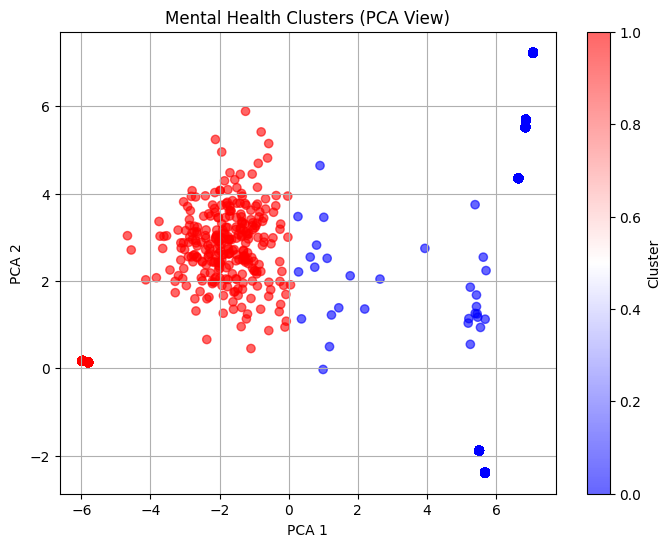

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_clustered.columns = df_clustered.columns.map(lambda x: '_'.join(map(str, x)) if isinstance(x, tuple) else str(x))

# Step 1: Select the features used for clustering (excluding the cluster label itself)
features = df_clustered.drop(columns=['mental_health_cluster'])

features = features.select_dtypes(include=['number'])

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Step 3: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Plot
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=df_clustered['mental_health_cluster'],
    cmap='bwr', alpha=0.6
)
plt.title('Mental Health Clusters (PCA View)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [46]:
df_clustered.groupby('mental_health_cluster').mean(numeric_only=True)


,Age,8. What is your highest level of education?,8. Please indicate the highest level of schooling completed by your mother:,8. Please indicate the highest level of schooling completed by your Father:,8. How often do you exercise or walk ?,"8. If given a choice between a healthy meal and junk food, which would you pick?",8. How many times a week do you eat home-cooked meals instead of fast food?,How happy are you with your living situation?,8. Are you satisfied with your choice to pursue this degree program?,20.Do you consider your course load stressful?,...,"8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?_Never","8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?_Occasionally","8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?_Often","8. Do you prefer sugary drinks (e.g., soda, energy drinks) over water or fresh juices?_Sometimes",8. Has anyone in your family been diagnosed with psychological condition ?_No,8. Has anyone in your family been diagnosed with psychological condition ?_Yes,encoded_8. What field did you choose for your studies?_8. What field did you choose for your studies?,Gender_Female,Gender_Male,Gender_Prefer not to say
mental_health_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000565,0.851664,2.965076,4.199604,1.482267,1.235807,1.235463,11.997714,17.997849,10.998501,...,0.001143,0.000012,0.000578,0.002028,0.003048,0.000872,0.000069,0.000000,0.000000,0.000000
1,0.004368,0.009506,0.011311,0.014557,0.005003,0.010335,0.006248,0.019633,0.042195,0.026125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000600,0.001513,0.002355,0.000024


In [47]:
%pip install rapidfuzz

## Random Forest

In [61]:
for col, method in encoding_strategy.items():
    if col not in df.columns or method == 'drop_or_nlp':
        continue
    elif method.lower() in ['onehot', 'one-hot']:
        df = onehotencode_column(df, col)
    elif method == 'label':
        df = labelencode_column(df, col)

In [49]:
y = df['mental_health_cluster']  # target label

X = df.drop(columns=['mental_health_cluster'])

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Drop non-numeric columns before training
non_numeric_cols = X_train.select_dtypes(include=['object', 'category']).columns
X_train = X_train.drop(columns=non_numeric_cols)
X_test = X_test.drop(columns=non_numeric_cols)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
from sklearn.metrics import classification_report, accuracy_score

# Convert column names to strings
X_test.columns = X_test.columns.astype(str)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9998775485213984
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16275
           1       1.00      1.00      1.00     16391

    accuracy                           1.00     32666
   macro avg       1.00      1.00      1.00     32666
weighted avg       1.00      1.00      1.00     32666



F1 Score (macro): 0.9998775468689022
Recall (macro): 0.9998771121351766
Precision (macro): 0.999878011588899


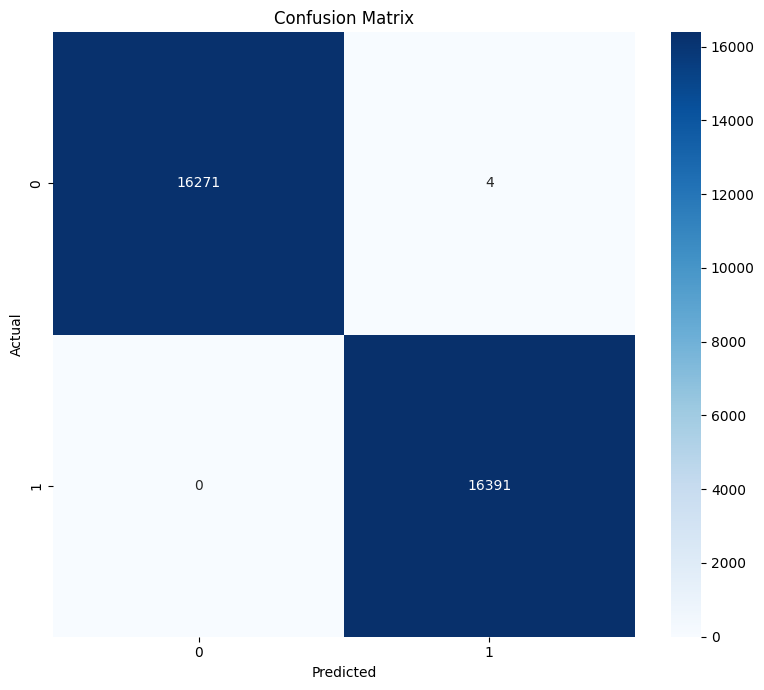

/tmp/ipython-input-78-2788906224.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], orient='h', palette='viridis')


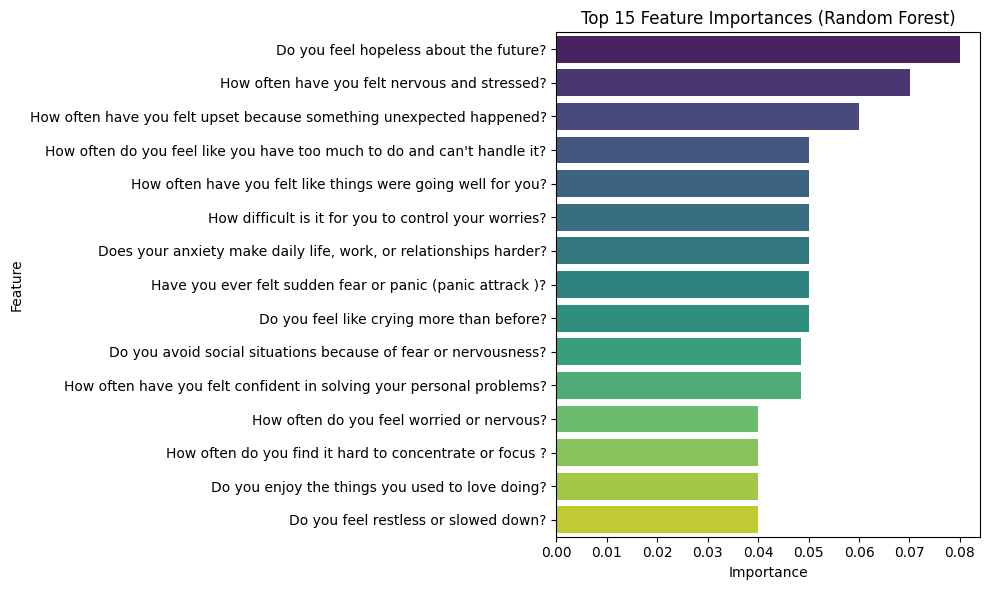

In [78]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 7)) # Increased figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    feature_names = X_train.columns
    indices = np.argsort(importances)[-15:][::-1]  # Top 15 features
    plt.figure(figsize=(10,6))
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], orient='h', palette='viridis')
    plt.title('Top 15 Feature Importances (Random Forest)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

## Results based on depression/anxiety/stress scores grouped by behaviors

In [73]:
# Calculate average scores
df['Depression_Score'] = df[[
    "How often do you feel sad or down?",
    "Do you feel hopeless about the future?",
    "How often do you feel bad about yourself or guilty?",
    "Do you enjoy the things you used to love doing?",
    "Do you have trouble sleeping?",
    "Do you feel like crying more than before?",
    "Do you feel restless or slowed down?",
    "Have you had thoughts about harming yourself?"
]].apply(LabelEncoder().fit_transform).mean(axis=1)

df['Anxiety_Score'] = df[[
    "How often do you feel worried or nervous?",
    "Do you find yourself worrying excessively about different things",
    "How difficult is it for you to control your worries?",
    "Do you experience physical symptoms like sweating, shaking, or a racing heartbeat when anxious?",
    "Do you feel uneasy or find it hard to relax?",
    "How often do you find it hard to concentrate or focus ?",
    "Do you avoid social situations because of fear or nervousness?",
    "Have you ever felt sudden fear or panic (panic attrack )?",
    "Does your anxiety make daily life, work, or relationships harder?",
    "How often do you feel like something bad is going to happen, even if there’s no clear reason?"
]].apply(LabelEncoder().fit_transform).mean(axis=1)

df['Stress_Score'] = df[[
    "How often have you felt upset because something unexpected happened?",
    "How often have you felt like you couldn’t control the important parts of your life?",
    "How often have you felt nervous and stressed?",
    "How often have you felt confident in solving your personal problems?",
    "How often have you felt like things were going well for you?",
    "How often do you feel like you have too much to do and can't handle it?",
    "How often have you been able to stay calm and control your anger when something irritated you?",
    "How often have you felt like you were in control of your life and responsibilities?",
    "How often have you felt angry because things happened that were out of your control?",
    "How often have you felt like your problems were too big to handle?"
]].apply(LabelEncoder().fit_transform).mean(axis=1)

print("By Junk Food Preference:")
print(df.groupby("8. If given a choice between a healthy meal and junk food, which would you pick?")[['Depression_Score', 'Anxiety_Score', 'Stress_Score']].mean())

print("\nBy Course Load Stress:")
print(df.groupby("20.Do you consider your course load stressful?")[['Depression_Score', 'Anxiety_Score', 'Stress_Score']].mean())

By Junk Food Preference:
                                                    Depression_Score  \
8. If given a choice between a healthy meal and...                     
0                                                           1.767837   
1                                                           1.796875   
2                                                           1.522727   
3                                                           1.451754   
4                                                           1.537760   
5                                                           4.125000   

                                                    Anxiety_Score  \
8. If given a choice between a healthy meal and...                  
0                                                        1.757103   
1                                                        1.325000   
2                                                        1.309091   
3                                                    

### 1. Bar Plot: Junk Food Preference vs. Mental Health Scores

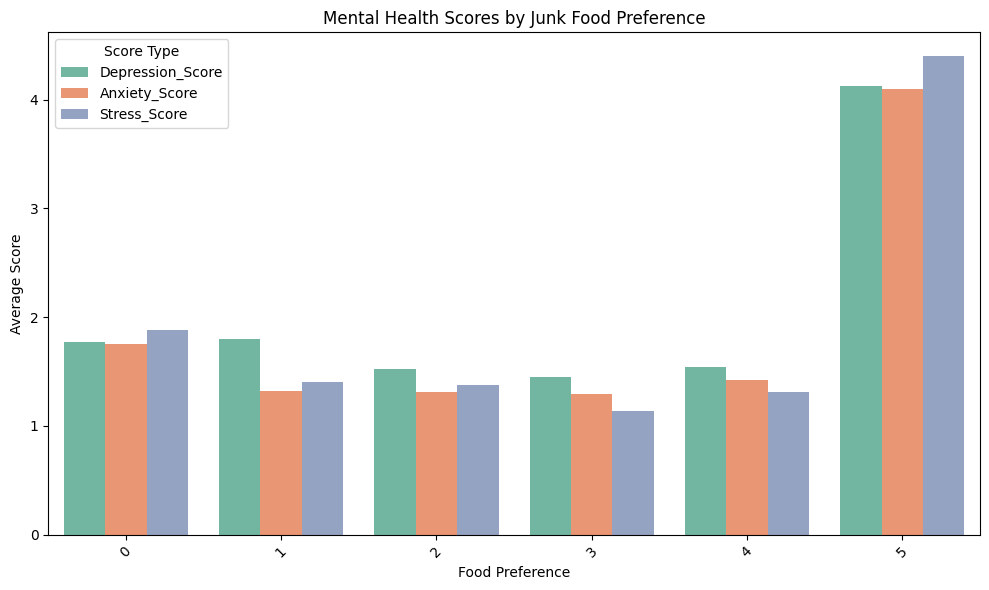

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by junk food preference
junk_summary = df.groupby("8. If given a choice between a healthy meal and junk food, which would you pick?")[['Depression_Score', 'Anxiety_Score', 'Stress_Score']].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
junk_plot = pd.melt(junk_summary, id_vars="8. If given a choice between a healthy meal and junk food, which would you pick?",
                    value_vars=["Depression_Score", "Anxiety_Score", "Stress_Score"],
                    var_name="Score Type", value_name="Average Score")

sns.barplot(data=junk_plot, x="8. If given a choice between a healthy meal and junk food, which would you pick?",
            y="Average Score", hue="Score Type", palette="Set2")

plt.title("Mental Health Scores by Junk Food Preference")
plt.xlabel("Food Preference")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.legend(title="Score Type")
plt.tight_layout()
plt.show()

### 2. Bar Plot: Course Load Stress vs. Mental Health Scores

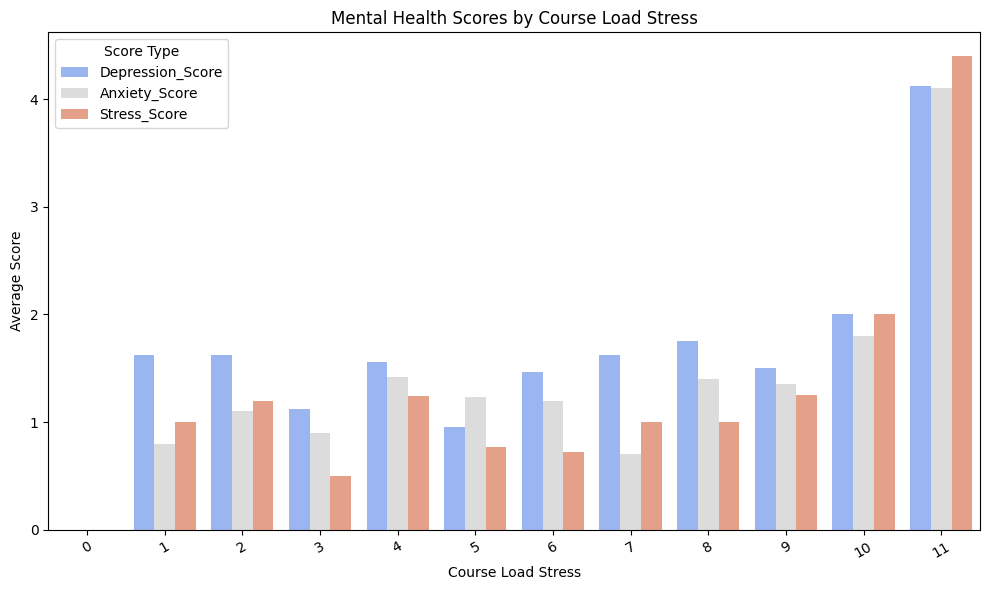

In [56]:
# Group by course load stress
course_load_summary = df.groupby("20.Do you consider your course load stressful?")[['Depression_Score', 'Anxiety_Score', 'Stress_Score']].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
course_plot = pd.melt(course_load_summary, id_vars="20.Do you consider your course load stressful?",
                      value_vars=["Depression_Score", "Anxiety_Score", "Stress_Score"],
                      var_name="Score Type", value_name="Average Score")

sns.barplot(data=course_plot, x="20.Do you consider your course load stressful?",
            y="Average Score", hue="Score Type", palette="coolwarm")

plt.title("Mental Health Scores by Course Load Stress")
plt.xlabel("Course Load Stress")
plt.ylabel("Average Score")
plt.xticks(rotation=30)
plt.legend(title="Score Type")
plt.tight_layout()
plt.show()

**Explanation of the Junk Food Preference vs. Mental Health Scores Plot:**

This bar plot shows the average Depression, Anxiety, and Stress scores across different categories of junk food preference. Higher bars indicate higher average scores for that mental health measure within that preference group. This visualization helps to explore if there are observable differences in average mental health scores based on how frequently individuals choose healthy meals over junk food.

**Explanation of the Course Load Stress vs. Mental Health Scores Plot:**

This bar plot displays the average Depression, Anxiety, and Stress scores based on how stressful individuals perceive their course load to be. Each group on the x-axis represents a different level of perceived course load stress. The height of the bars for each score type indicates the average mental health score for that stress level, allowing for a visual comparison of mental health scores across different levels of academic stress.